In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

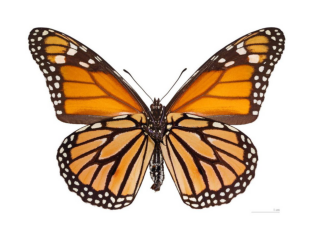

In [28]:
img = plt.imread('/content/butterfly.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
type(img)

numpy.ndarray

In [30]:
print(img.shape)

(931, 1280, 3)


In [31]:
print(img.size)

3575040


In [32]:
w,h,d = img.shape
image_array = img.reshape(w*h,d)
print(image_array.shape)
image_array = image_array/255

(1191680, 3)


In [33]:
from sklearn.utils import shuffle
image_array_sample = shuffle(image_array,random_state=1)[:1000]
image_array_sample.size

3000

In [34]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(image_array_sample)

KMeans(n_clusters=3, random_state=1)

In [35]:
labels = kmeans.predict(image_array)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [36]:
print(kmeans.cluster_centers_)
c = kmeans.cluster_centers_

[[0.99093497 0.98691105 0.98195311]
 [0.84211601 0.54832516 0.22085376]
 [0.26208145 0.14990447 0.10624434]]


In [37]:
def recreate_image(c,labels,w,h,d):
  image = np.zeros((w,h,d))
  label_idx = 0

  for i in range(w):
    for j in range(h):
      image[i][j] = c[labels[label_idx]]

      label_idx+=1
    
  return (image)

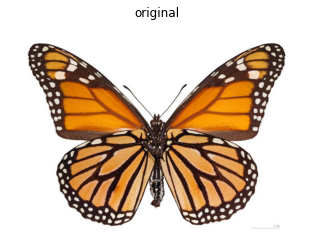

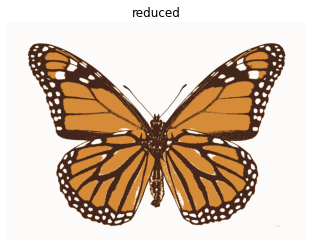

In [38]:
plt.figure(1)
plt.axis('off')
plt.title("original")
plt.imshow(img)
plt.show()

plt.figure(2)
plt.axis('off')
plt.title("reduced")
plt.imshow(recreate_image(c,labels,w,h,d))
plt.show()